# Lecture 2: Numerical Integration

## Summary
- Integration methods
  - Finding polynomial $P(x)$ suitable for sample data
  - Integrate $P(x)$ using following methods
    - 1. interpolation
      2. integration (trapezium and simpson's methods)
  - finding integral up to certain precision $k$
    - finding error corresponding to precision using Taylor series

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.interpolate as sc

## Theory

### 1. Interpolation Theory

# Example Problems

__Example Problem:__ A cyclist is training for an event on a low budget, so she only has an analog speedometer and a bike to train with. During each hour long training session, she writes down her speed $(v)$ every 15 minutes $(t)$.

|$t$ [min] | 0 | 15 | 30 | 45 | 60 |
|--|--|--|--|--|--|
|$v$ [km/h] | 20 | 35 | 15 | 32 | 30 |


She is interested in finding the total distance travelled during the training hour. How can she do this with the dataset she has?

She has a discrete set of data points which can be plotted on a graph.

We know that the total distance travelled $(d)$ as a function of time $d(t)$, is simply the integral of the speed across the total time travelled i.e.

$$
s(t)=\int_0^t v(t') dt'.
$$
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s(t)=$ total distance $(s)$ travelled after some time $(t)$ after integration \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $v(t')=$ speed travelled at a time $t'$ \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $dt'=$ time elements to integrate across

_note that t' and $t$ is just to distinguish between the integral or total time t and differential time element $t'$_

Using the more familiar analytical method we'd need the function for $v(t)$ in order to integrate, however we only have samples of v(t) at various different points. What to do?

1. Find a function that fits through every point (interpolation)
2. Integrate this function

__How to phrase this question in general terms?__ \
Can be written as given a finite set of points $(t_i,v_i)$ where $t_i=$ time and $v_i=$ speed and $i = 0, 1, 2, 3, ..., n$. that lie between a range $[a,b]$ such that each $i$ corresponds to the index of each finite set of points $x_0 < x_1 < x_2 <...<x_n$ etc. and $a=x_0$ and $b=x_n$

alternatively, $v_i$ can be written as $v_i=f(x_i)$ so for all $i$'s (index) there is a pair of data points.

We're interested in finding the integral across the whole range [a,b] of our existing data from indexes $i=0$ to $i=n$. of our real value $f(x_i)$

\begin{equation}
I=\int_a^b f(x) dx.
\end{equation}

although we can't find the exact $f(x)$ function we can instead find an approximation of a $P(x)$ polynomial that passes through the sample data and will pretty much give us close to the integral $I$ for the real function $f(x)$.

### Example Problem:

#### 1. Find a function $P(x)$ that fits through every data point.

Going back to our example problem let's find a polynomial $P(x)$ that fits through our data.

|$t$ [min] | 0 | 15 | 30 | 45 | 60 |
|--|--|--|--|--|--|
|$v$ [km/h] | 20 | 35 | 15 | 32 | 30 |

According to our theory we have $n+1=5$ counts of sample data points, meaning $n=4$ intervals. We know that our unique polynomial $P(x)$ will have a degree $\leq n$ so degree of 4 or less.

Barycentric algorithm as a method for generating a function $P(x)$ given a sample of data. Built in no need to code this simply call the algorithm.

Why this? be cause the more stable and recommended of the other algorithms available in scipy's interpolate library - can experiment with others.

```
CREATE variables for measured data
    CREATE variables for time [t] and speed [v]
FIND interpolating polynomial P(x) that passes through measured data
    USE interpolation algorithm on [t] and [v] to find P(x)
CREATE datapoints for evaluation of P(x)
    CREATE variable for time [t]
    CALL P(x) with time [t] as input to find corresponding speed [v]
```

In [3]:
# create dataset
t = np.arange(0, 61, 15) # time (t)
v = np.array([20, 35, 15, 32, 30]) # speed (v)

# create function P(x) for dataset
B = sc.BarycentricInterpolator(t,v) # use interpolation algorithm

# create datapoints for evaluation of P(x)
t_plot = np.arange(0, 60, 0.01)

# evaluate polynomial P(x) in input values
v_plot = B.__call__(t_plot)

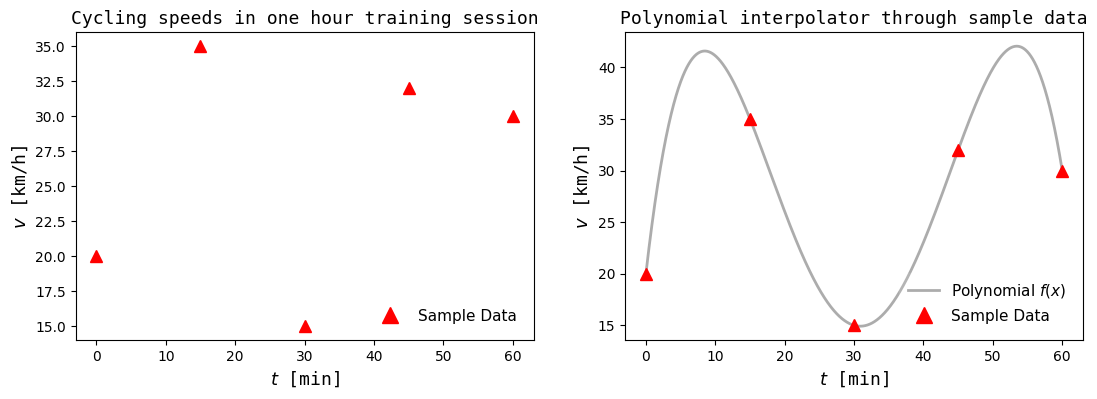

In [4]:
# plot data
fig, axs = plt.subplots(1,2, figsize=(13,4))

axs[0].plot(t, v, '^', color='red', label='Sample Data', markersize=8) # sample data

axs[1].plot(t_plot, v_plot, label='Polynomial $f(x)$', color='dimgrey', lw=2, alpha=.55,) # interpolating polynomial
axs[1].plot(t, v, '^', color='red', label='Sample Data', markersize=8)

# format graph(s)
font = {'family':'monospace', 'color':'black', 'size':13} # set font dictionary
title = {'family':'monospace', 'color':'black', 'size':15} # set font dictionary

# format sample data
axs[0].set_title('Cycling speeds in one hour training session', fontdict=font)
axs[0].set_xlabel('$t$ [min]', fontdict=font)
axs[0].set_ylabel('$v$ [km/h]', fontdict=font)
axs[0].legend(loc='lower right', framealpha=.1, edgecolor='none', fancybox=False, markerscale=1.5, borderpad=.6, fontsize=11)

 # format interpolating polynomial
axs[1].set_title('Polynomial interpolator through sample data', fontdict=font)
axs[1].set_xlabel('$t$ [min]', fontdict=font)
axs[1].set_ylabel('$v$ [km/h]', fontdict=font)
axs[1].legend(loc='lower right', framealpha=.1, edgecolor='none', fancybox=False, markerscale=1.5, borderpad=.6, fontsize=11)

### Example Problem:
back to solving our problem with varying degrees of polynomial orders.

|$t$ [min] | 0 | 15 | 30 | 45 | 60 |
|--|--|--|--|--|--|
|$v$ [km/h] | 20 | 35 | 15 | 32 | 30 |

incase your forgot it was to find the integral of v(t) so we know the distance travelled after the hour-long training session.

#### Example Problem: Solve using simple trapezium

```
FIND integral of dataset using simple trapezium
CREATE variables for dataset
CREATE variables for integration points
CREATE function for simple trapezium method
    USE y values and step size [h] as input
FIND integral between integration points
```

In [10]:
# create data
v = np.array([20, 35, 15, 32, 30]) # speed (v)
th = t / 60
h = (th[-1] - th[0]) / 60 # set step size (h)

iv = np.array([v[0], v[-1]]) # integration points
it = np.array([th[0], th[-1]])

# polynomial integration
def int_simptrap(y,h):
    '''
    simple trapezium method
    '''
    return (h / 2) * (y[0] + y[-1])

0.42 m


Text(1.0, 30, '$(x_1, f(x_1))$')

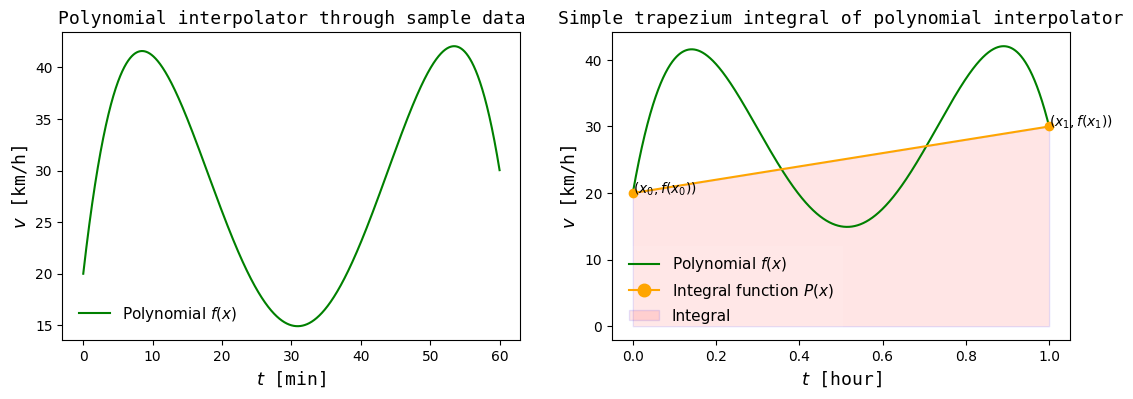

In [9]:
# find integration
print(np.round(int_simptrap(v,h), 2), 'm')

# plot data
fig, axs = plt.subplots(1, 2, figsize=(13,4))

axs[0].plot(t_plot, v_plot, color='green', label='Polynomial $f(x)$') # polynomial function

axs[1].plot(t_plot / 60, v_plot, color='green', label='Polynomial $f(x)$') # polynomial function
axs[1].plot(it, iv, marker='o', color='orange', markersize=6, label='Integral function $P(x)$') # integration points
axs[1].fill_between(it, iv, color="red", alpha=0.1, edgecolor='blue', label='Integral')

# format graph
axs[0].set_xlabel('$t$ [min]', fontdict=font)
axs[0].set_ylabel('$v$ [km/h]', fontdict=font)
axs[0].set_title('Polynomial interpolator through sample data', fontdict=font)
axs[0].legend(loc='best', edgecolor='none', fancybox=False, markerscale=1.5, borderpad=.6, framealpha=.1, fontsize=11)

axs[1].set_xlabel('$t$ [hour]', fontdict=font)
axs[1].set_ylabel('$v$ [km/h]', fontdict=font)
axs[1].set_title('Simple trapezium integral of polynomial interpolator', fontdict=font)
axs[1].legend(loc='best', edgecolor='none', fancybox=False, markerscale=1.5, borderpad=.6, framealpha=.1, fontsize=11)
axs[1].annotate('$(x_0, f(x_0))$', xy=(th[0],v[0]), textcoords='data', fontsize=10) # integral points
axs[1].annotate('$(x_1, f(x_1))$', xy=(th[-1],v[-1]), textcoords='data', fontsize=10)

```
SOLVE using simple composite trapezium
CREATE variable for integration points
    CREATE variable for each number of integration points (N)
    CALL interpolating polynomial to evaluate at time (t) for each N
CREATE composite trapezium function
    CALL function to find integration
```

In [12]:
# convert time (t) to hour
it10 = np.linspace(0, 60, 10) # N =10
iv10 = B.__call__(it10)

it5 = np.linspace(0, 60, 5) # N = 5
iv5 = B.__call__(it5)

h10 = (it10[1] - it[0]) / 60 
h5 = (it5[1] - it5[0]) / 60

# create composite trapezium function
def int_comptrap(y,h):
    """
    composite trapezium method
    """
    return (h/2) * (y[0] + y[-1] + ( 2*np.sum(y[1:-1]) ))

# find integration
print('Total Area (N = 10) :', np.round(int_comptrap(iv10, h10), 2), 'm')
print('Total Area (N = 5) :', np.round(int_comptrap(iv5, h5)), 'm')

Total Area (N = 10) : 29.1 m
Total Area (N = 5) : 27.0 m


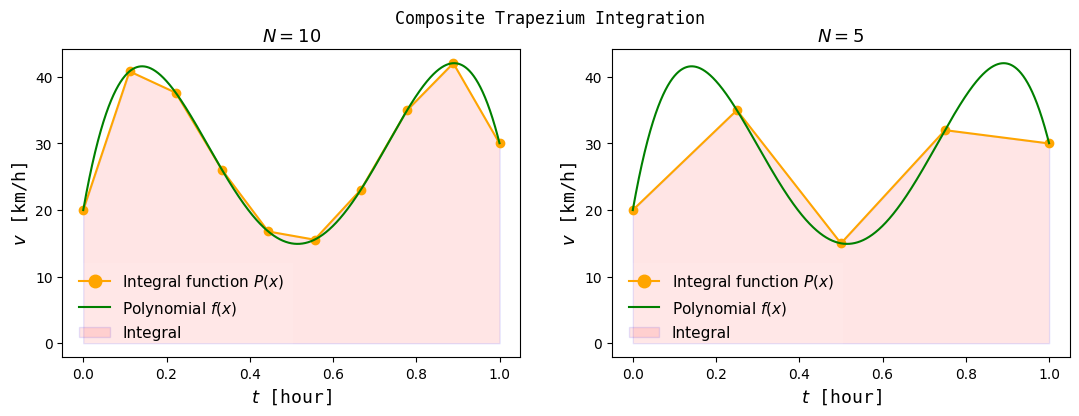

In [13]:
# plot data
fig, axs = plt.subplots(1, 2, figsize=(13,4))

fig.suptitle('Composite Trapezium Integration', fontdict=title)

axs[0].plot(it10 / 60, iv10, marker='o', color='orange', markersize=6, label='Integral function $P(x)$') # integration points
axs[0].plot(t_plot / 60, v_plot, color='green', label='Polynomial $f(x)$') # polynomial function
axs[0].fill_between(it10 / 60, iv10, color="red", alpha=0.1, edgecolor='blue', label='Integral')

axs[1].plot(it5 / 60, iv5, marker='o', color='orange', markersize=6, label='Integral function $P(x)$') # integration points

axs[1].plot(t_plot / 60, v_plot, color='green', label='Polynomial $f(x)$') # polynomial function
axs[1].fill_between(it5 / 60, iv5, color="red", alpha=0.1, edgecolor='blue', label='Integral')

# format graph
axs[0].set_xlabel('$t$ [hour]', fontdict=font)
axs[0].set_ylabel('$v$ [km/h]', fontdict=font)
axs[0].set_title('$N = 10$', fontdict=font)
axs[0].legend(loc='best', framealpha=.1, edgecolor='none', fancybox=False, markerscale=1.5, borderpad=.6, fontsize=11)

axs[1].set_xlabel('$t$ [hour]', fontdict=font)
axs[1].set_ylabel('$v$ [km/h]', fontdict=font)
axs[1].set_title('$N=5$', fontdict=font)
axs[1].legend(loc='best', framealpha=.1, edgecolor='none', fancybox=False, markerscale=1.5, borderpad=.6, fontsize=11)

### Verifying the method is $O(h^2)$

__What is the significance of verifying a method is $O(h^2)$?__ \
We established before that generally the higher order of h the higher the accuracy.

For polynomial methods (later) we'll see that the higher-order can often capture the behaviour of the data or integrand better.

```
VERIFY a method is O(h^2)
    PLOT graph comparing a method's error with h^2
        CREATE variable for range of number of intervals (N) to test
        CREATE variable for analytical solution
        CREATE empty zeros array to store error values
        CREATE loop to find error at each N in array
        PLOT graph of error array vs h^2
```

In [16]:
# create data
a, b = 0, 9 # integral limits

# create f(x)
x_plot = np.arange(a, b, 1e-1)
y_plot = (x_plot**2) * np.sin(x_plot)

# create P(x) for certain N
ix10 = np.linspace(0, 9, 10) # N = 10
fx10 = (ix10**2) * np.sin(ix10)

n = np.arange(2, 150, 2) # number of N to test

# create array for error of each N
err_t = np.zeros(len(n))

# find analytical solution
h_x = -2 -79 * np.cos(9) + 18 * np.sin(9)

# find error for each N
for i in range(len(n)):
    x = np.linspace(a, b, n[i]+1) # create range of x-axis values between [a,b] separated into the interval(s) in n[i]+1
    f_x = x**2 * np.sin(x) # create corresponding f(x) y-axis values between [a,b]
    g_x = int_comptrap( f_x, (b-a)/n[i] )
    err_t[i] = np.abs(h_x - g_x)

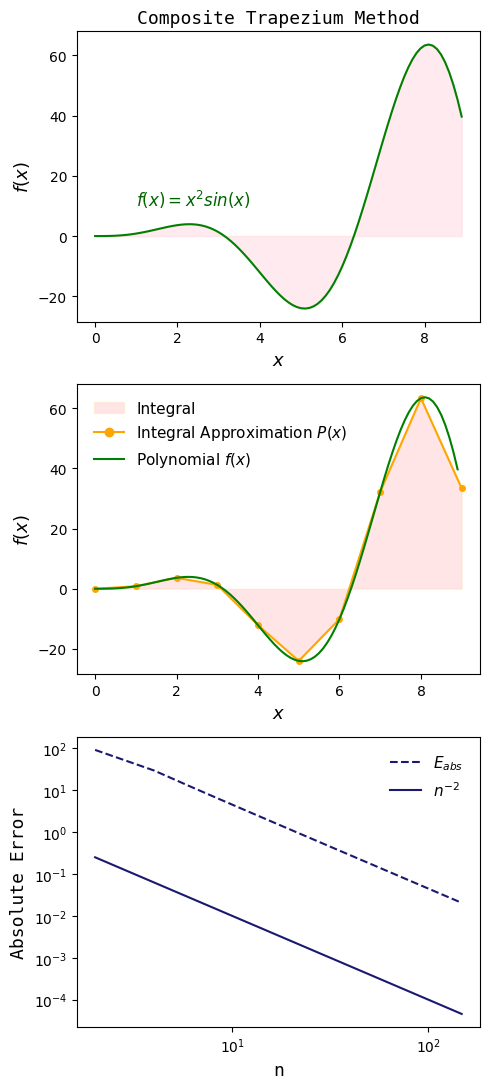

In [19]:
# plot graphs
fig, axs = plt.subplots(3, 1, figsize=(5,11))

axs[0].plot(x_plot, y_plot, color='green', label='Polynomial $f(x)$') # function f(x)
axs[0].fill_between(x_plot, y_plot, color='pink', alpha=.3)
axs[0].set_xlabel('$x$', fontdict=font)
axs[0].set_ylabel('$f(x)$', fontdict=font)
axs[0].annotate('$f(x) = x^{2} sin(x)$', xy=(1,10), fontsize=12, color='darkgreen')
axs[0].set_title('Composite Trapezium Method', fontdict=font)

axs[1].fill_between(ix10, fx10, color='red', alpha=.1, edgecolor='orange', label='Integral')
axs[1].plot(ix10, fx10, marker='o', color='orange', label='Integral Approximation $P(x)$', markersize=4) # function f(x)
axs[1].plot(x_plot, y_plot, color='green', label='Polynomial $f(x)$') # function f(x)
axs[1].set_xlabel('$x$', fontdict=font)
axs[1].set_ylabel('$f(x)$', fontdict=font)
axs[1].legend(loc='best', framealpha=.1, edgecolor='none', fancybox=False, markerscale=1.5, borderpad=.6, fontsize=11)

axs[2].loglog(n, err_t, '--', color='midnightblue', lw=1.5, label='$E_{abs}$') # absolute errors
axs[2].loglog(n, 1/n**2, '-', color='midnightblue', lw=1.5, label='$n^{-2}$')
axs[2].set_xlabel('n', fontdict=font)
axs[2].set_ylabel('Absolute Error', fontdict=font)
axs[2].tick_params(which='minor', length=0)
axs[2].legend(loc='best', framealpha=.1, edgecolor='none', fancybox=False, markerscale=1.5, borderpad=.6, fontsize=11)


fig.tight_layout()
# format graph

We can see that yhe absolute error of the numerical solution is proportional to $O(h^2)$ or $O(n^{-2})$ therefore our composite trapezium method is of the form $O(h^2)$.

### Example Problem: Solving using Simpson's rule

i.e. using 2nd or 3rd order polynomials instead of trapeziums & to compare error between the methods.

```
SOLVE using simpson's method
    CREATE function for simpson's method
        FIND interpolating polynomial for function to be solved
        CALL polynomial to evaluate y values for each N
        INSERT y values and corresponding step size h into function
```

```
VERIFY method is of the form O(h^-4)
    CREATE variable for analytical solution
    CREATE array of zeros to store error
    CREATE range of number of intervals N at which to find integral
    CREATE loop to find error at each N
        PUT error in empty array of zeros
    
```

In [29]:
# create data
it5 = np.linspace(0, 60, 5) # N = 2
iv5 = B.__call__(it5)

it3 = np.linspace(0, 60, 3)  # N = 1
iv3 = B.__call__(it3)

# create function for simpson's method
def int_simp(y,h):
    """
    Simpson's Method
    """
    return (y[0] + 4*(np.sum(y[1:-1:2])) + 2*(np.sum(y[2:-1:2])) + y[-1]) * h / 3

# find error of method
sol = -2 - 79 * np.cos(9) + 18 * np.sin(9) # analytical solution

err_s = np.zeros(len(n))

n = np.arange(2, 150, 2)

a, b = 0, 9 # domain

for k in range(len(n)):
    x = np.linspace(a, b, n[k]+1)
    I = int_simp(x**2*np.sin(x), (b-a)/n[k])
    err_s[k] = abs(I - sol)


# create quadratic function
def quad(x, a, b):
    return (a * x**2) + (b*x)

# obtain coefficients for fitted curved function
p1 = np.polyfit(it5[0:3], iv5[0:3], 2) # coefficient for first 3 points
p2 = np.polyfit(it5[2:], iv5[2:], 2) # coefficient for last 3 points
p3 = np.polyfit(it3, iv3, 2)

# create data for fit plot
it50 = np.linspace(0, 60, 50)
it100 = np.linspace(0, 60, 100)

# create quadratic function out of obtained coefficients
pp1 = np.polyval(p1, it100[:50]) # quad function for first 3 points
pp2 = np.polyval(p2, it100[49:])
pp3 = np.polyval(p3, it100)

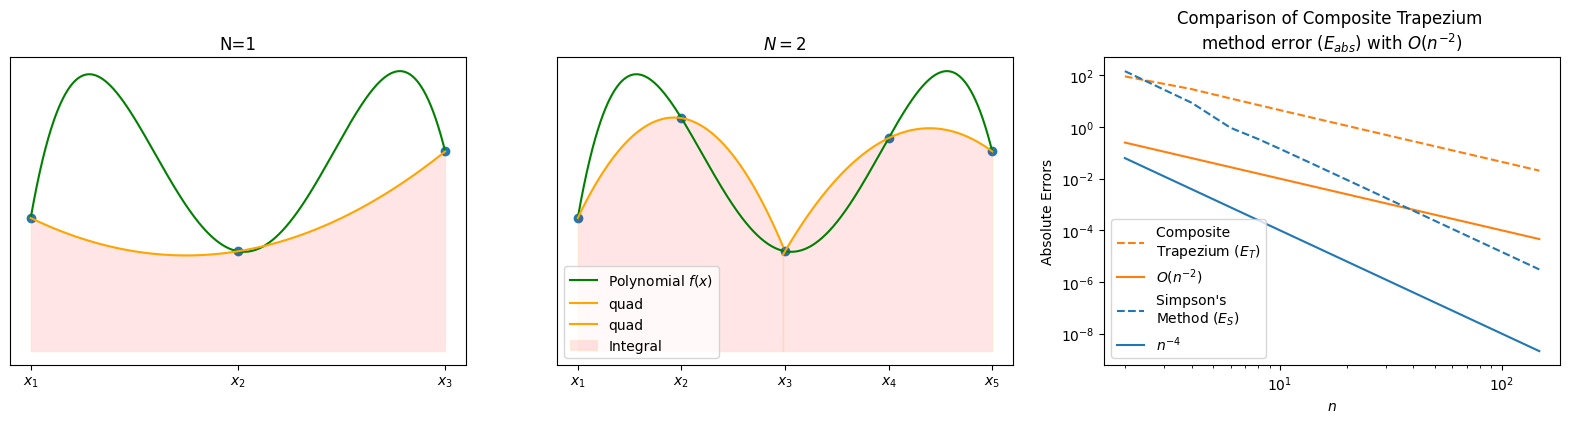

In [22]:
# plot data
fig, axs = plt.subplots(1, 3, figsize=(20,4))

axs[0].scatter(it3, iv3, marker='o')
axs[0].plot(t_plot, v_plot, color='green', label='Polynomial $f(x)$')
axs[0].plot(it100, pp3, color='orange', label='quad')
axs[0].fill_between(it100, pp3, color='red', alpha=.1, edgecolor='orange')
axs[0].set_title('N=1')
axs[0].set_yticks([])
axs[0].set_xticks(np.arange(0, 61, 30), labels=['$x_{}$'.format(i) for i in range(1,4)])


axs[1].plot(t_plot, v_plot, color='green', label='Polynomial $f(x)$') # polynomial function
axs[1].scatter(it5, iv5, marker='o')
axs[1].plot(it100[:50], pp1, color='orange', label='quad')
axs[1].plot(it100[49:], pp2, color='orange', label='quad')
axs[1].fill_between(it100[:50], pp1, color='red', alpha=.1, edgecolor='orange', label='Integral')
axs[1].fill_between(it100[49:], pp2, color='red', alpha=.1, edgecolor='orange')
axs[1].legend(loc='best', fontsize=10)
axs[1].set_title('$N=2$')
axs[1].set_yticks([])
axs[1].set_xticks(np.arange(0, 61, 15), labels=['$x_{}$'.format(i) for i in range(1,6)])

axs[2].title.set_text('Comparison of Composite Trapezium \nmethod error $(E_{abs})$ with $O(n^{-2})$')
axs[2].loglog(n, err_t, '--', color='C1', label='Composite \nTrapezium $(E_{T})$')
axs[2].loglog(n, 1/n**2, '-', color='C1', label='$O(n^{-2})$')

axs[2].loglog(n, err_s, '--', color='C0', label="Simpson's \nMethod $(E_{S})$")
axs[2].loglog(n, 1/n**4, '-', label='$n^{-4}$', color='C0')  
axs[2].set(xlabel='$n$', ylabel='Absolute Errors')
axs[2].legend(loc='best', fontsize=10)

We want to find the lowest interval ($N$) required for a chosen precision ($k$). This is important because for this method lower interval means less computational effort.

```
FIND minimum number of intervals N needed for solution of certain precision
    PLOT f^(2)(x) to find its limit (M) for precision (k)
    SOLVE for number of interval (N) using M and k
```

For precision  5  decimal places
We need  30587.0  number of intervals


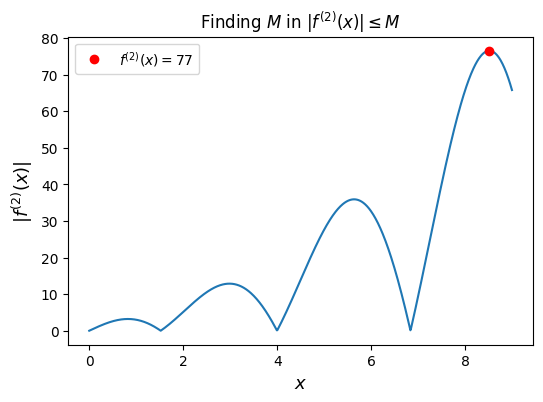

In [33]:
x = np.arange(0, 9, 0.01) # inputs for f^(2)(x)
f2d = abs(4 * x * np.cos(x) + (2 - x**2) * np.sin(x)) # calculate f^(2)(x)

# plot all the possible values of f^(2)(x) and find the max M
plt.figure(figsize=(6,4))
plt.plot(x, f2d)
plt.xlabel('$x$', fontsize=13); plt.ylabel('$|f^{(2)}(x)|$', fontsize=13)
plt.plot(x[np.where(f2d==max(f2d))], f2d[np.where(f2d==max(f2d))], 'o', color='red', label='$f^{(2)}(x)= %d$' % np.round(max(f2d)) )
plt.legend(loc='best'); plt.title('Finding $M$ in $|f^{(2)}(x)| \leq M$')
M = np.round(max(f2d))

k = 5

# calculate the interval (n) corresponding to M
n = np.round( np.sqrt( ((b-a)**3 / 12) * (M / (0.5 * 10 **(-k))) ) )

print("For precision ", k, " decimal places")
print("We need ", n, " number of intervals")

We can confirm this by using the same $n$ in the composite trapezium method.

In [13]:
n = np.ceil( np.sqrt( ((b-a)**3 / 12) * (M / (0.5 * 10 **(-5))) ) ) # M from approximation
n = int(n)
x_e = np.linspace(b, a, n+1) # generate x values for f(x) with intervals (int)
f_e = x_e**2 * np.sin(x_e) # generate f(x)
g_e = Int_T(f_e, (b-a)/n) # generate integral of f(x)
err_e = abs(sol - g_e)

print("Trapezium Method: \nNumber of points (N) =", len(x_e), "\nCorresponding Error =", err_e)
print("Can see that indeed for the estimated 30588 the error is indeed below 0.5*10^-5 as we wanted the error to be confined within.")

Trapezium Method: 
Number of points (N) = 30588 
Corresponding Error = 4.789493743828643e-07
Can see that indeed for the estimated 30588 the error is indeed below 0.5*10^-5 as we wanted the error to be confined within.


We can do the exact same for Simpson's method.

let's choose M = 95.0
Number of intervals (n) = 283 Error =  2.310100057911768e-07


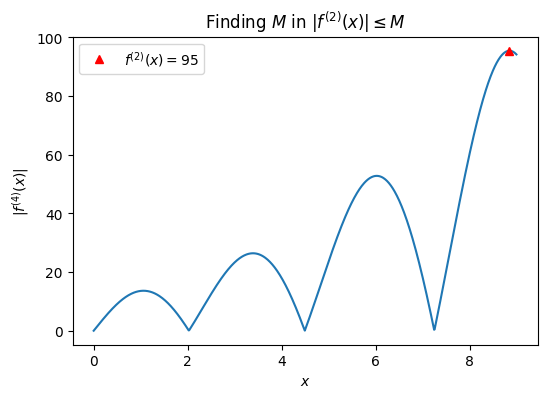

In [35]:
x = np.arange(0, 9, 0.01) # create inputs for f^(4)(x)
a,b = 0,9
f4d = abs(-8 * x * np.cos(x) + (x**2 - 12) * np.sin(x)) # fourth differential f^(4)(x)
plt.figure(figsize=(6,4))
plt.plot(x, f4d)
plt.xlabel('$x$'), plt.ylabel('$|f^{(4)}(x)|$');
plt.title('Finding max limits $(M)$ of $|f^{(4)}(x)|$')

# finding M
plt.plot(x[np.where(f4d==max(f4d))], f4d[np.where(f4d==max(f4d))], '^', color='red', label='$f^{(2)}(x)= %d$' % np.round(max(f4d)) )
plt.legend(loc='best'); plt.title('Finding $M$ in $|f^{(2)}(x)| \leq M$')
M = np.round(max(f4d))

# calculate the interval (n) corresponding to M

n_s = ((( (b-a)**5) / (32*90) ) * ( M / (0.5e-5) ))**(1/4)
n_s = int(np.ceil(n_s)) # number of intervals (n)
x_s = np.linspace(a, b, 2* n_s + 1)
# why not accounted for in the question(?)

I_S = int_simp(x_s**2 * np.sin(x_s), (b-a) / (2 * n_s))
err_s = abs(sol-I_S)
print("let's choose M =", M)
print("Number of intervals (n) =", len(x_s), "Error = ", err_s)